# Importing required libraries

In [1]:
#importing all libraries
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [2]:
#Loading the data
df = pd.DataFrame(pd.read_csv('/Users/utkarshmittal/Desktop/Education/Plaksha/Term 2/ML Lab1/ML Project/plaksha21-cm005-project/train.csv'))
df

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.40,0.00,170323,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.80,0.40,121776,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.00,0.00,271435,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.00,0.15,171316,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.00,0.00,280388,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119777,c,37.37,271.95,0.00,0.0,258,22,2.38,0.00,171906,...,0,281.467,347.533,15.667,20.967,232.067,187.883,232.000,243.217,low
119778,e,43.00,778.48,0.02,0.0,254,10,8.23,0.00,177751,...,0,405.767,512.100,24.800,34.033,348.167,287.933,376.800,401.517,medium
119779,g,34.13,790.10,0.00,0.0,218,2,6.10,0.00,191205,...,0,600.167,804.817,20.433,27.800,439.717,581.467,475.950,561.750,medium
119780,g,34.50,942.70,0.02,0.0,217,2,5.18,0.00,197985,...,0,625.733,866.500,20.783,28.150,568.600,568.567,479.100,722.650,high


In [3]:
#Description of data set
df.describe()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,...,119782.000000,119782.000000,1.197820e+05,1.197820e+05,119782.000000,119782.000000,1.197820e+05,1.197820e+05,1.197820e+05,1.197820e+05
mean,163.301465,684.666261,7.421276,1.606043,243.818529,10.850871,7.229671,2.366581,176817.446202,68123.317477,...,0.075888,0.508833,2.063725e+08,1.375818e+08,31.279652,42.382363,4.687999e+12,7.188179e+12,6.563013e+12,5.313130e+12
std,547.578970,1435.427676,79.390552,21.437873,43.397069,5.428206,8.247744,23.459765,53470.917016,20073.343007,...,0.337381,3.486546,2.915828e+10,2.380783e+10,24.287782,33.278828,4.188527e+14,5.186389e+14,4.955808e+14,4.458990e+14
min,0.000000,0.000000,0.000000,0.000000,165.000000,1.000000,0.000000,0.000000,84609.000000,39823.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.633000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34.100000,350.370000,0.000000,0.000000,217.000000,10.000000,0.300000,0.000000,132817.000000,54668.000000,...,0.000000,0.000000,3.204500e+02,3.556500e+02,16.200000,21.583000,2.625670e+02,2.450170e+02,2.543670e+02,2.440330e+02
50%,42.850000,558.300000,0.000000,0.000000,247.000000,10.000000,4.430000,0.000000,177264.000000,60634.000000,...,0.000000,0.000000,3.874500e+02,4.642500e+02,21.633000,28.983000,3.273330e+02,3.022915e+02,3.172670e+02,3.014330e+02
75%,70.370000,712.680000,0.020000,0.000000,271.000000,12.000000,11.150000,0.000000,197856.750000,92905.000000,...,0.000000,0.000000,4.601457e+02,5.553170e+02,64.683000,88.733000,4.181000e+02,3.936790e+02,4.097670e+02,3.995830e+02
max,11567.100000,15169.270000,4305.720000,738.820000,323.000000,23.000000,83.330000,788.580000,280780.000000,105380.000000,...,6.000000,54.000000,4.119986e+12,4.119987e+12,78.933000,108.317000,3.743147e+16,3.743147e+16,3.743147e+16,3.743147e+16


In [4]:
#Checking for any NaN value
df.isnull().values.any()

False

In [5]:
#Checking for Coorelation among data
df.corr()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
syst_direct_ipo_rate,1.000000,0.034246,0.167055,0.168932,0.072361,0.009420,-0.119826,0.171535,-0.087268,0.114042,...,0.006565,0.005111,-0.001289,-0.001099,0.103593,0.100387,0.006477,0.005923,-0.001498,-0.000101
syst_buffered_ipo_rate,0.034246,1.000000,0.034276,0.028839,0.145713,0.004016,0.038404,0.040738,-0.176282,0.241753,...,0.078017,-0.002909,0.000006,-0.000358,0.224844,0.217372,-0.001089,-0.001741,-0.001501,-0.001415
syst_page_fault_rate,0.167055,0.034276,1.000000,0.948283,0.023286,0.008499,-0.014547,0.970694,-0.029038,0.051810,...,0.030551,-0.001550,-0.000416,-0.000535,0.046337,0.043735,-0.000695,-0.001291,-0.000627,-0.001112
syst_page_read_ipo_rate,0.168932,0.028839,0.948283,1.000000,0.020210,0.006847,-0.024978,0.983197,-0.024165,0.039114,...,0.016958,-0.003199,-0.000405,-0.000433,0.035341,0.033524,-0.000680,-0.001037,-0.000853,-0.000892
syst_process_count,0.072361,0.145713,0.023286,0.020210,1.000000,0.267799,0.571984,0.030659,-0.981506,0.850905,...,0.140242,0.012137,0.002449,0.003187,0.846419,0.860096,0.000476,-0.000136,0.000506,-0.002986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
llb0_pkts_sentpsec,0.100387,0.217372,0.043735,0.033524,0.860096,-0.030913,0.603064,0.057015,-0.908975,0.969312,...,0.307629,0.002162,0.001265,0.003064,0.998826,1.000000,-0.000137,-0.002517,-0.004571,-0.002316
ewc0_pkts_recvpsec,0.006477,-0.001089,-0.000695,-0.000680,0.000476,0.004569,0.001809,-0.000504,0.000026,0.000644,...,0.004117,-0.001419,-0.000079,-0.000065,0.000018,-0.000137,1.000000,-0.000155,0.281612,-0.000133
ewc0_pkts_sentpsec,0.005923,-0.001741,-0.001291,-0.001037,-0.000136,0.005154,0.001384,-0.001398,0.001534,-0.002435,...,-0.001330,0.001953,-0.000098,-0.000080,-0.002651,-0.002517,-0.000155,1.000000,-0.000184,0.303319
ewd0_pkts_recvpsec,-0.001498,-0.001501,-0.000627,-0.000853,0.000506,0.006288,-0.000116,-0.000736,0.000243,-0.004102,...,-0.002979,0.002227,-0.000094,-0.000077,-0.004799,-0.004571,0.281612,-0.000184,1.000000,-0.000158


In [6]:
#Checking for unique value in m_id
df['m_id'].unique()

array(['c', 'a', 'f', 'e', 'g', 'b', 'd'], dtype=object)

In [7]:
#Checking for unique value in cpu_load
df['cpu_load'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [8]:
#Creating one hot encoding for m_id
a = pd.get_dummies(df['m_id'])
a

,a,b,c,d,e,f,g
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
119777,0,0,1,0,0,0,0
119778,0,0,0,0,1,0,0
119779,0,0,0,0,0,0,1
119780,0,0,0,0,0,0,1


In [9]:
#Concating the one hot encoing with the data set
df_1 = pd.concat([df,a],axis=1)
df_1

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load,a,b,c,d,e,f,g
0,c,38.50,458.07,0.00,0.0,259,22,0.40,0.00,170323,...,278.767,277.300,medium,0,0,1,0,0,0,0
1,a,66.43,657.65,0.43,0.0,272,12,23.80,0.40,121776,...,436.000,366.183,medium,1,0,0,0,0,0,0
2,f,29.07,322.25,0.00,0.0,171,10,0.00,0.00,271435,...,220.200,240.333,low,0,0,0,0,0,1,0
3,e,1063.13,286.92,4.08,0.0,253,10,0.00,0.15,171316,...,178.183,139.733,high,0,0,0,0,1,0,0
4,f,22.97,369.32,0.00,0.0,165,10,0.00,0.00,280388,...,274.200,237.250,low,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119777,c,37.37,271.95,0.00,0.0,258,22,2.38,0.00,171906,...,232.000,243.217,low,0,0,1,0,0,0,0
119778,e,43.00,778.48,0.02,0.0,254,10,8.23,0.00,177751,...,376.800,401.517,medium,0,0,0,0,1,0,0
119779,g,34.13,790.10,0.00,0.0,218,2,6.10,0.00,191205,...,475.950,561.750,medium,0,0,0,0,0,0,1
119780,g,34.50,942.70,0.02,0.0,217,2,5.18,0.00,197985,...,479.100,722.650,high,0,0,0,0,0,0,1


In [10]:
#Dropping the m_id column as it has been encoded 
df_1.drop('m_id',axis=1,inplace=True)
df_1

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load,a,b,c,d,e,f,g
0,38.50,458.07,0.00,0.0,259,22,0.40,0.00,170323,60557,...,278.767,277.300,medium,0,0,1,0,0,0,0
1,66.43,657.65,0.43,0.0,272,12,23.80,0.40,121776,102325,...,436.000,366.183,medium,1,0,0,0,0,0,0
2,29.07,322.25,0.00,0.0,171,10,0.00,0.00,271435,44159,...,220.200,240.333,low,0,0,0,0,0,1,0
3,1063.13,286.92,4.08,0.0,253,10,0.00,0.15,171316,68325,...,178.183,139.733,high,0,0,0,0,1,0,0
4,22.97,369.32,0.00,0.0,165,10,0.00,0.00,280388,40128,...,274.200,237.250,low,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119777,37.37,271.95,0.00,0.0,258,22,2.38,0.00,171906,60557,...,232.000,243.217,low,0,0,1,0,0,0,0
119778,43.00,778.48,0.02,0.0,254,10,8.23,0.00,177751,66105,...,376.800,401.517,medium,0,0,0,0,1,0,0
119779,34.13,790.10,0.00,0.0,218,2,6.10,0.00,191205,58975,...,475.950,561.750,medium,0,0,0,0,0,0,1
119780,34.50,942.70,0.02,0.0,217,2,5.18,0.00,197985,58020,...,479.100,722.650,high,0,0,0,0,0,0,1


In [11]:
#Creating input and output data drames
out = df_1['cpu_load']
inp = df_1.drop('cpu_load',axis=1)

In [12]:
#Splitting the data set into train and test in the ratio 9:1 using stratification
train_input,test_input,train_output,test_output = train_test_split(inp,out,random_state = 42,test_size = 0.1,stratify = out)        

In [13]:
#Checking the training input dataset and its size
train_input

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,a,b,c,d,e,f,g
96701,41.47,495.07,0.00,0.00,247,10,10.63,0.00,182187,66414,...,260.900,282.550,273.600,0,0,0,0,1,0,0
98027,77.90,789.60,15.60,2.27,272,12,23.42,7.03,128615,102395,...,568.950,432.883,382.733,1,0,0,0,0,0,0
38328,41.75,541.78,0.00,0.00,259,22,10.57,0.00,169821,59746,...,324.650,250.767,222.533,0,0,1,0,0,0,0
44124,2691.72,318.05,0.00,0.00,248,10,0.25,0.00,179427,66327,...,262.100,254.333,367.183,0,0,0,0,1,0,0
35595,30.80,380.43,0.00,0.00,171,10,0.00,0.00,270621,43874,...,279.967,255.150,247.183,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209,73.52,856.45,0.18,0.00,271,12,27.40,0.17,135714,101713,...,318.450,410.150,582.633,1,0,0,0,0,0,0
45948,38.20,221.82,0.08,0.00,224,10,0.00,0.00,199887,54319,...,243.083,169.717,195.767,0,0,0,1,0,0,0
8234,70.13,699.90,0.55,0.00,271,12,24.78,0.53,126045,102454,...,375.683,430.983,472.350,1,0,0,0,0,0,0
17701,39.80,526.93,0.00,0.00,253,10,11.35,0.00,176217,69130,...,333.333,319.250,223.483,0,0,0,0,1,0,0


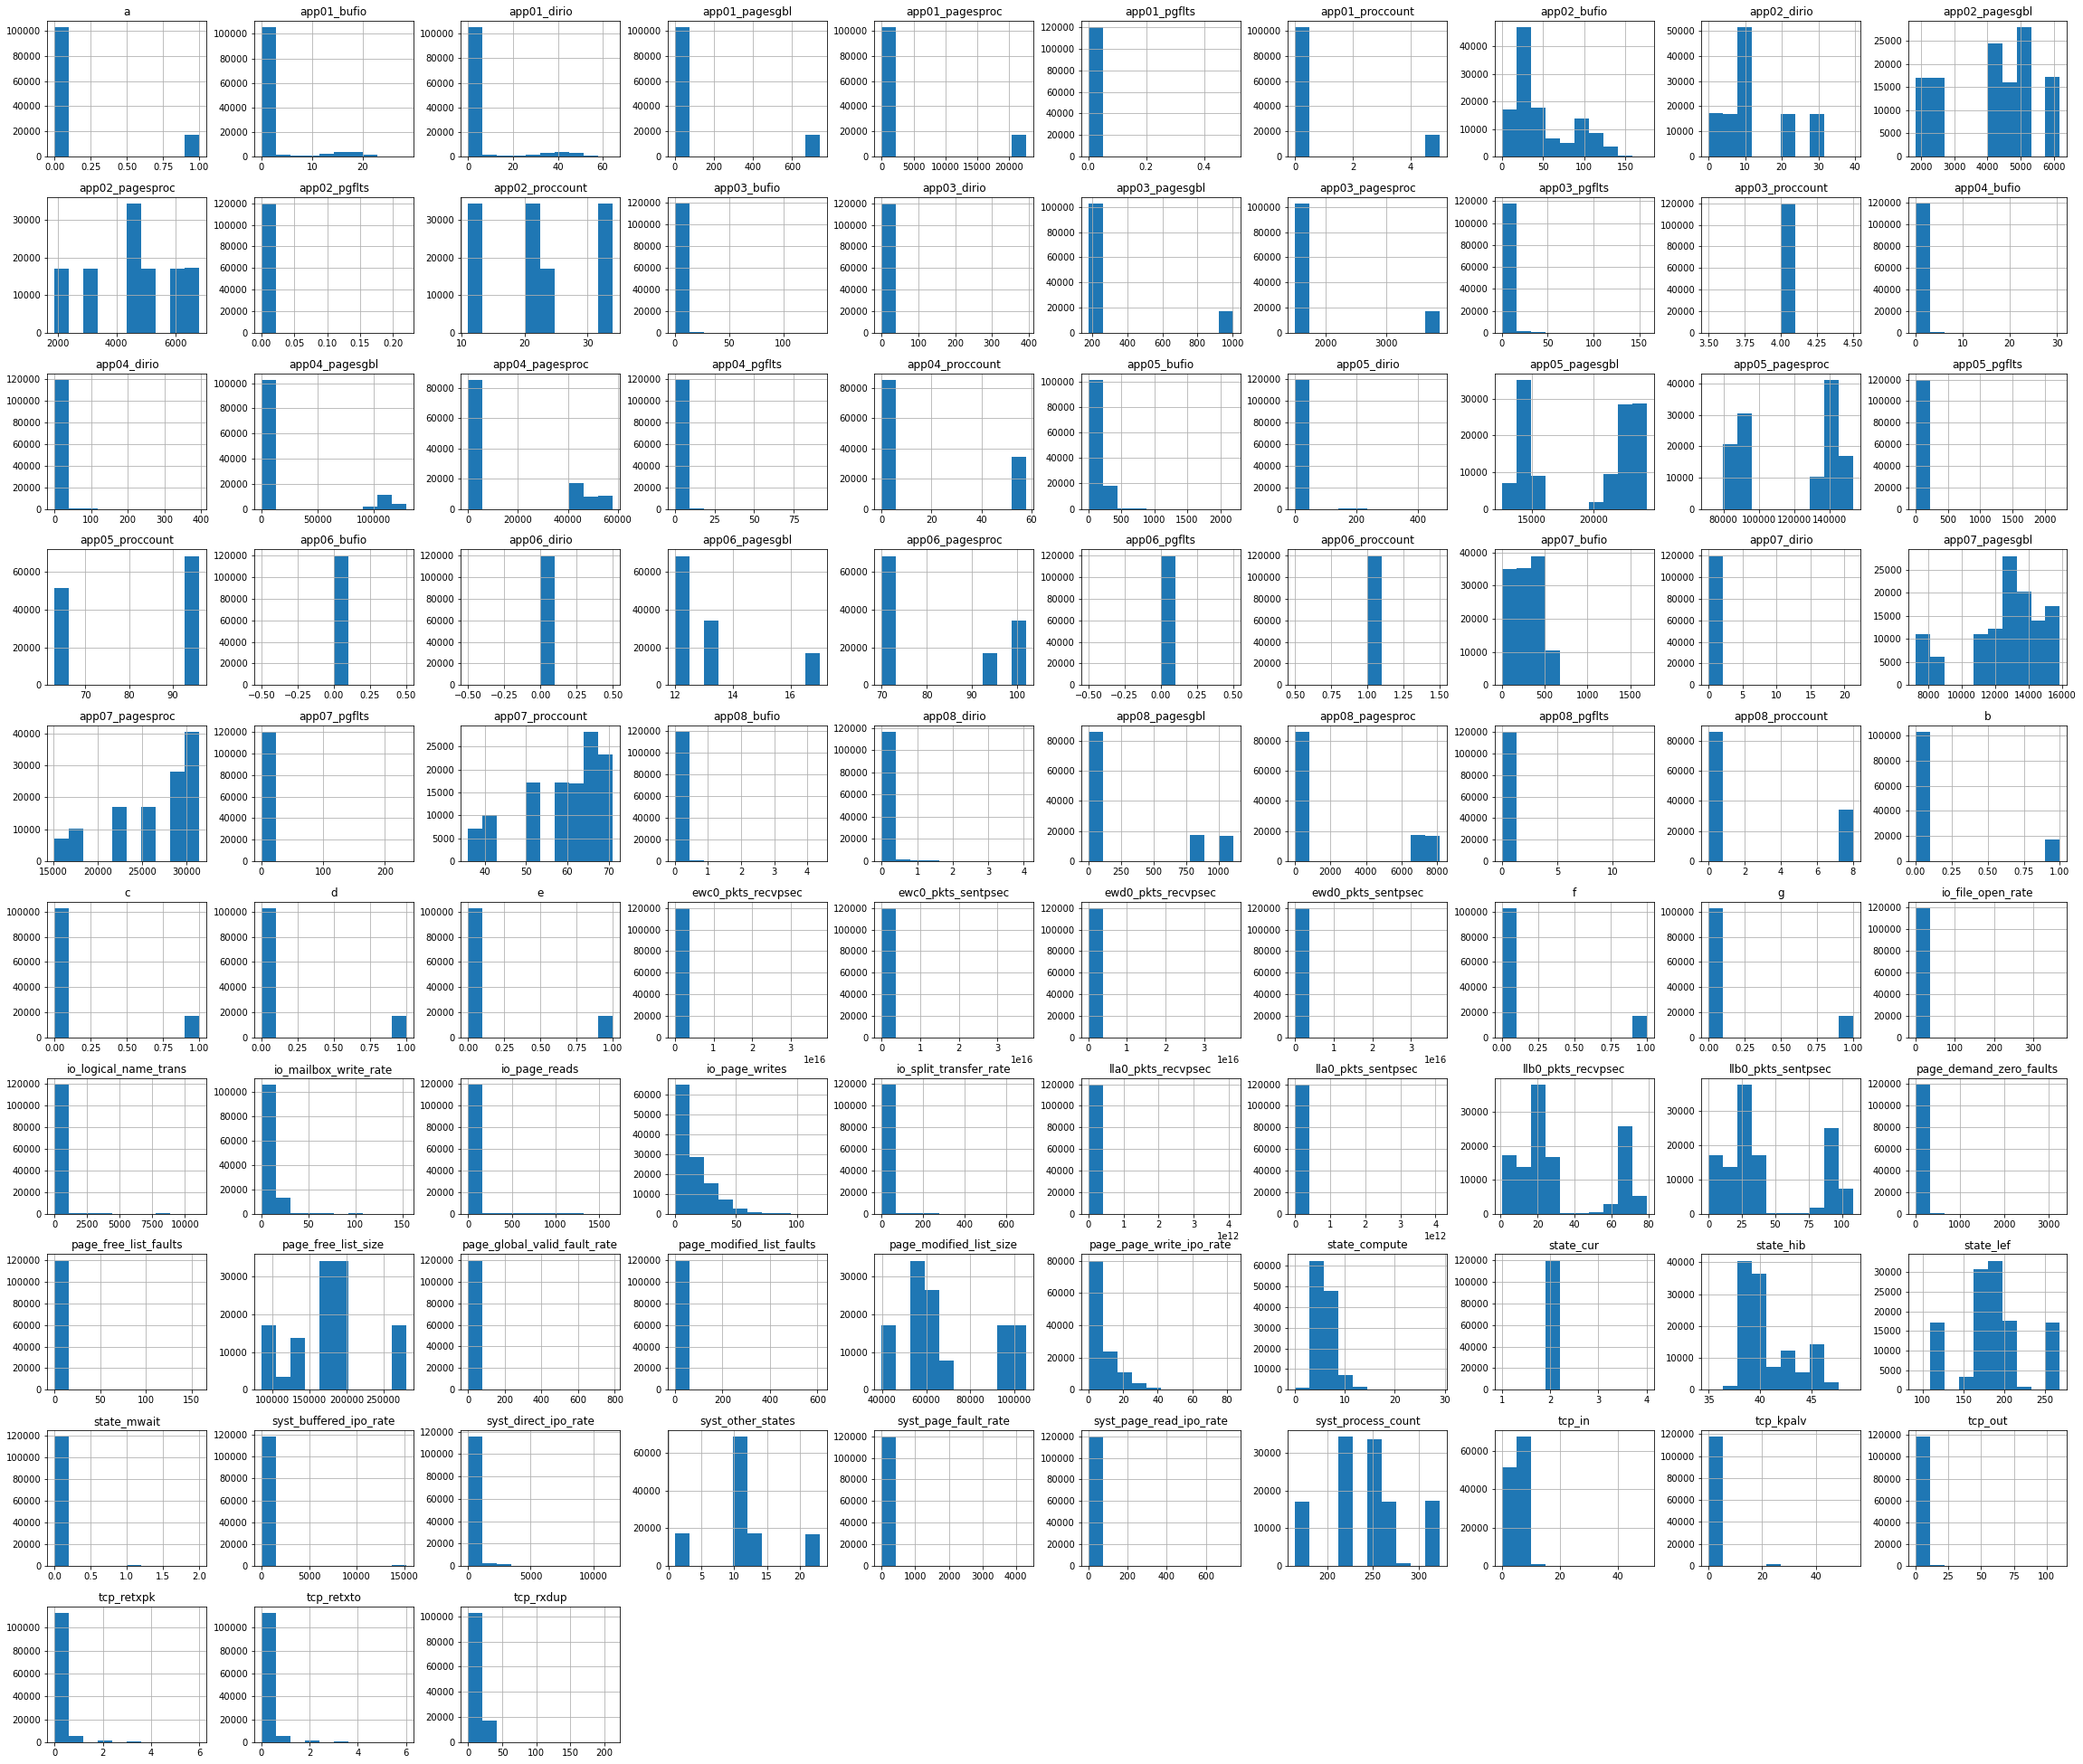

In [14]:
inp.hist(figsize=(40,35))
plt.show()

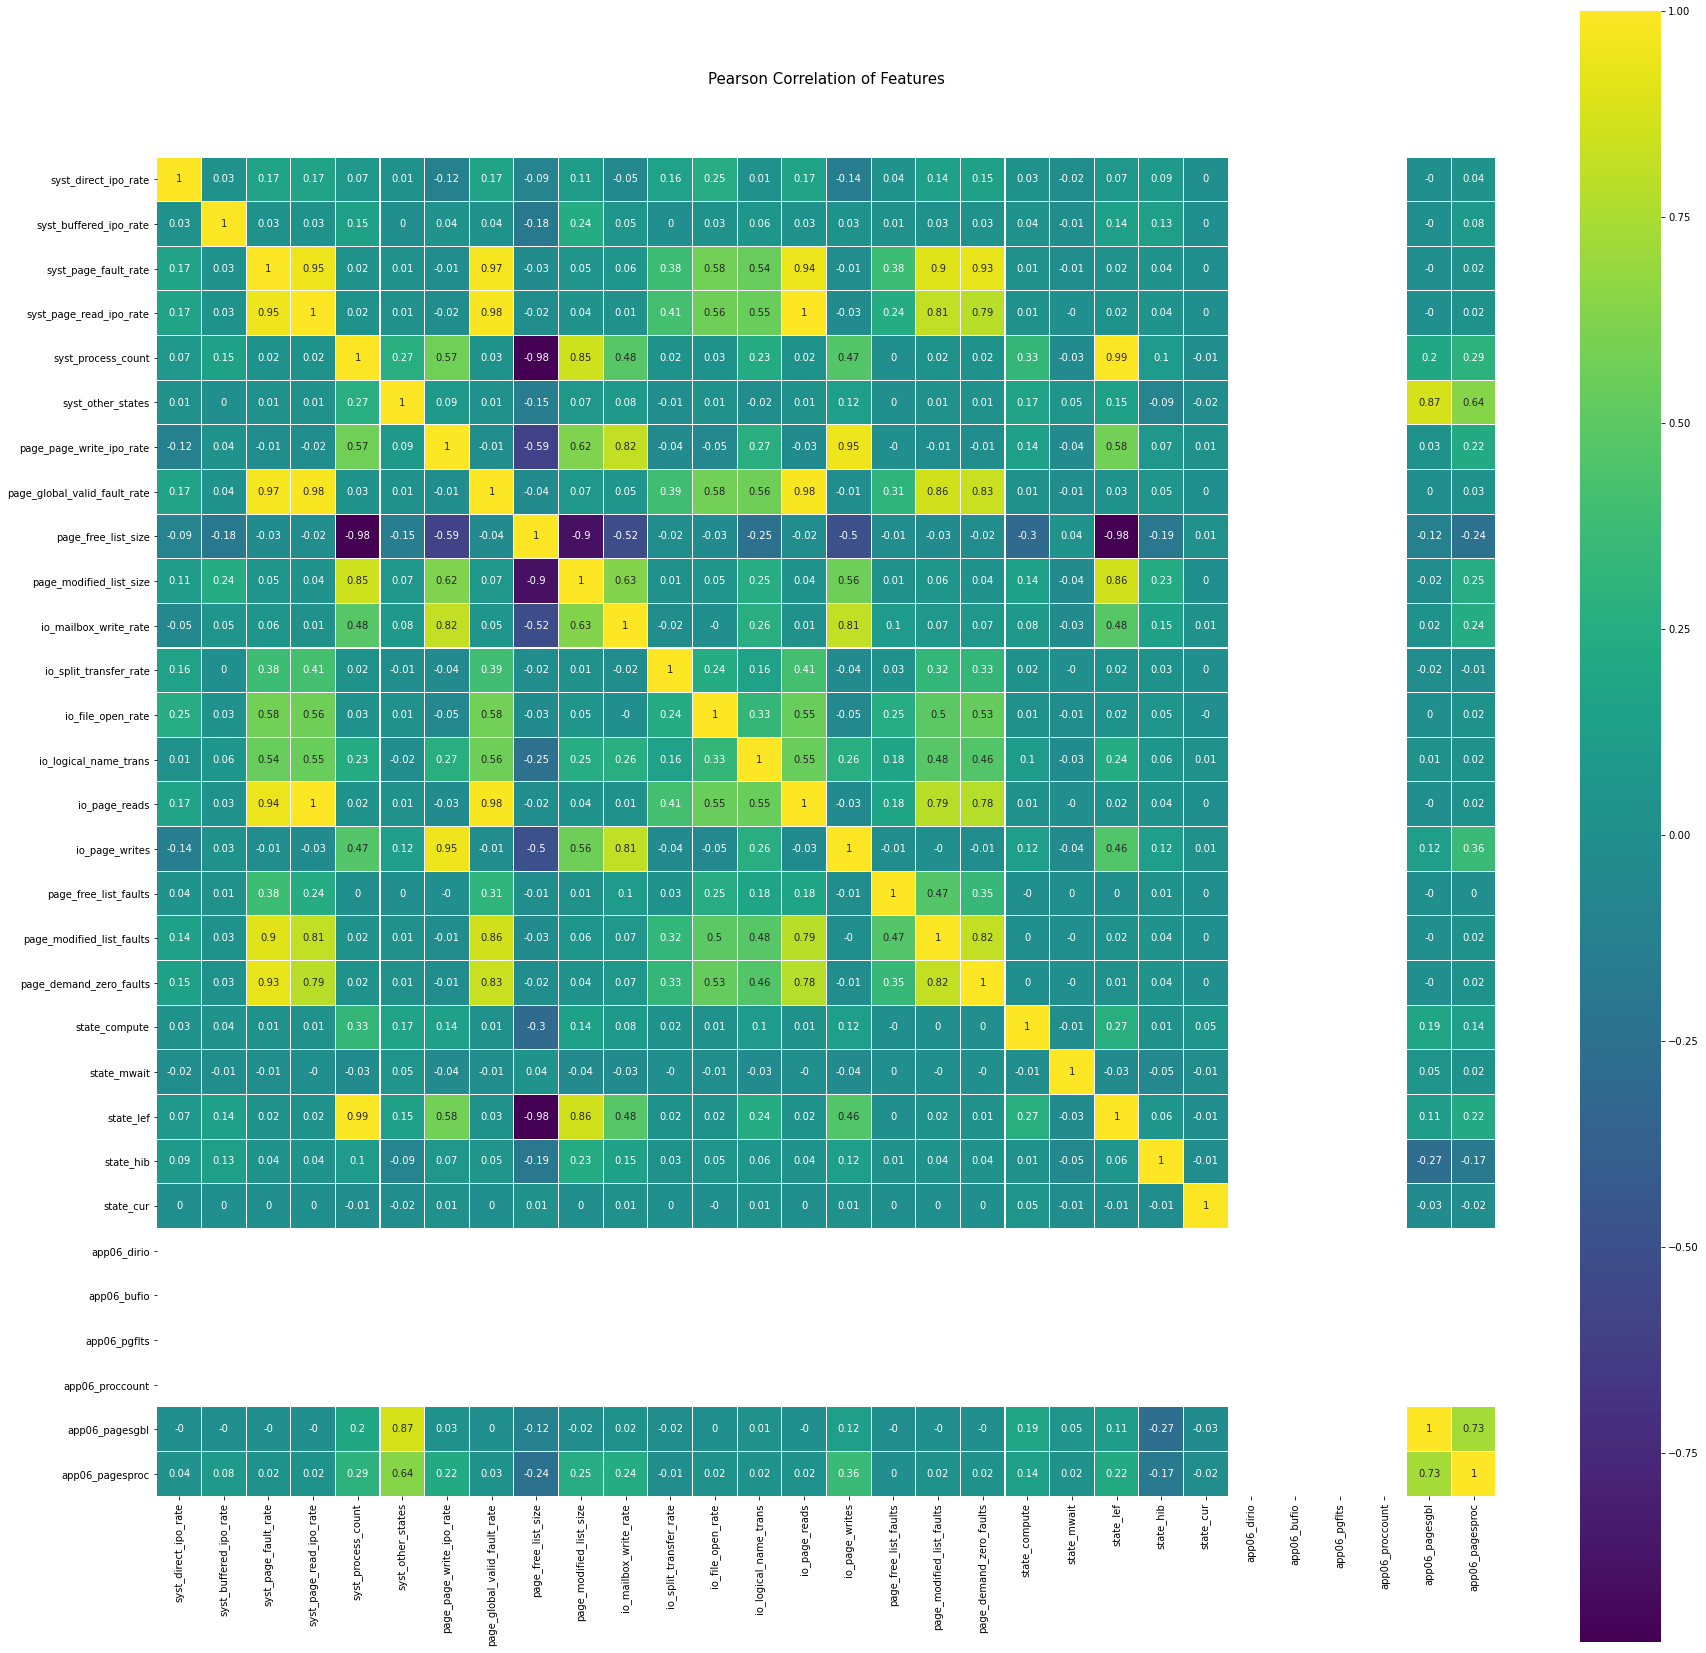

In [15]:
# Uncorrelated features are generally more powerful predictors
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(inp[inp.columns[:30]].corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

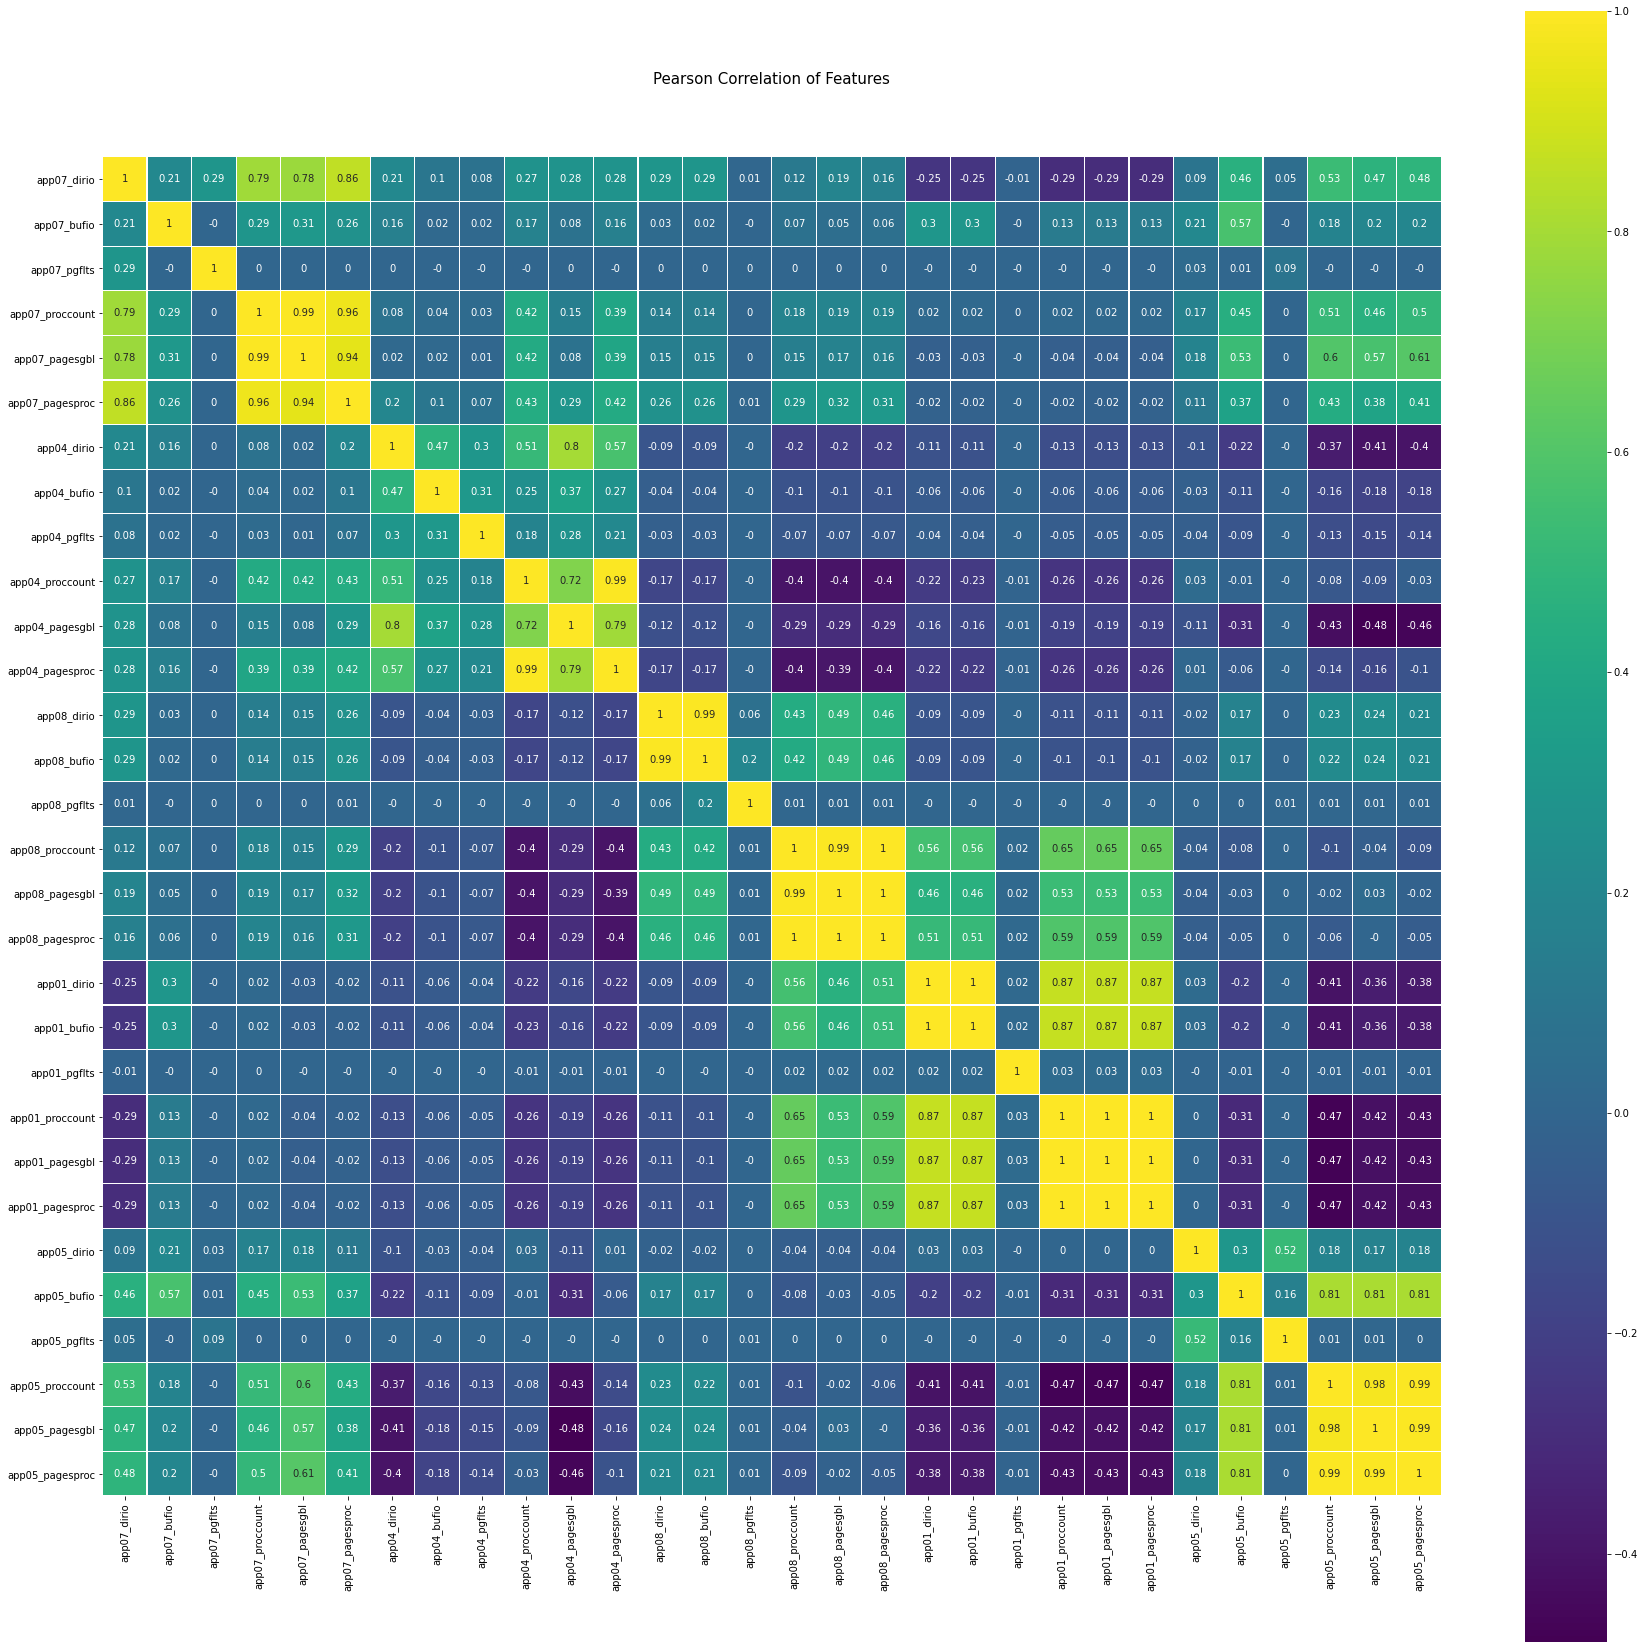

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(inp[inp.columns[30:60]].corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

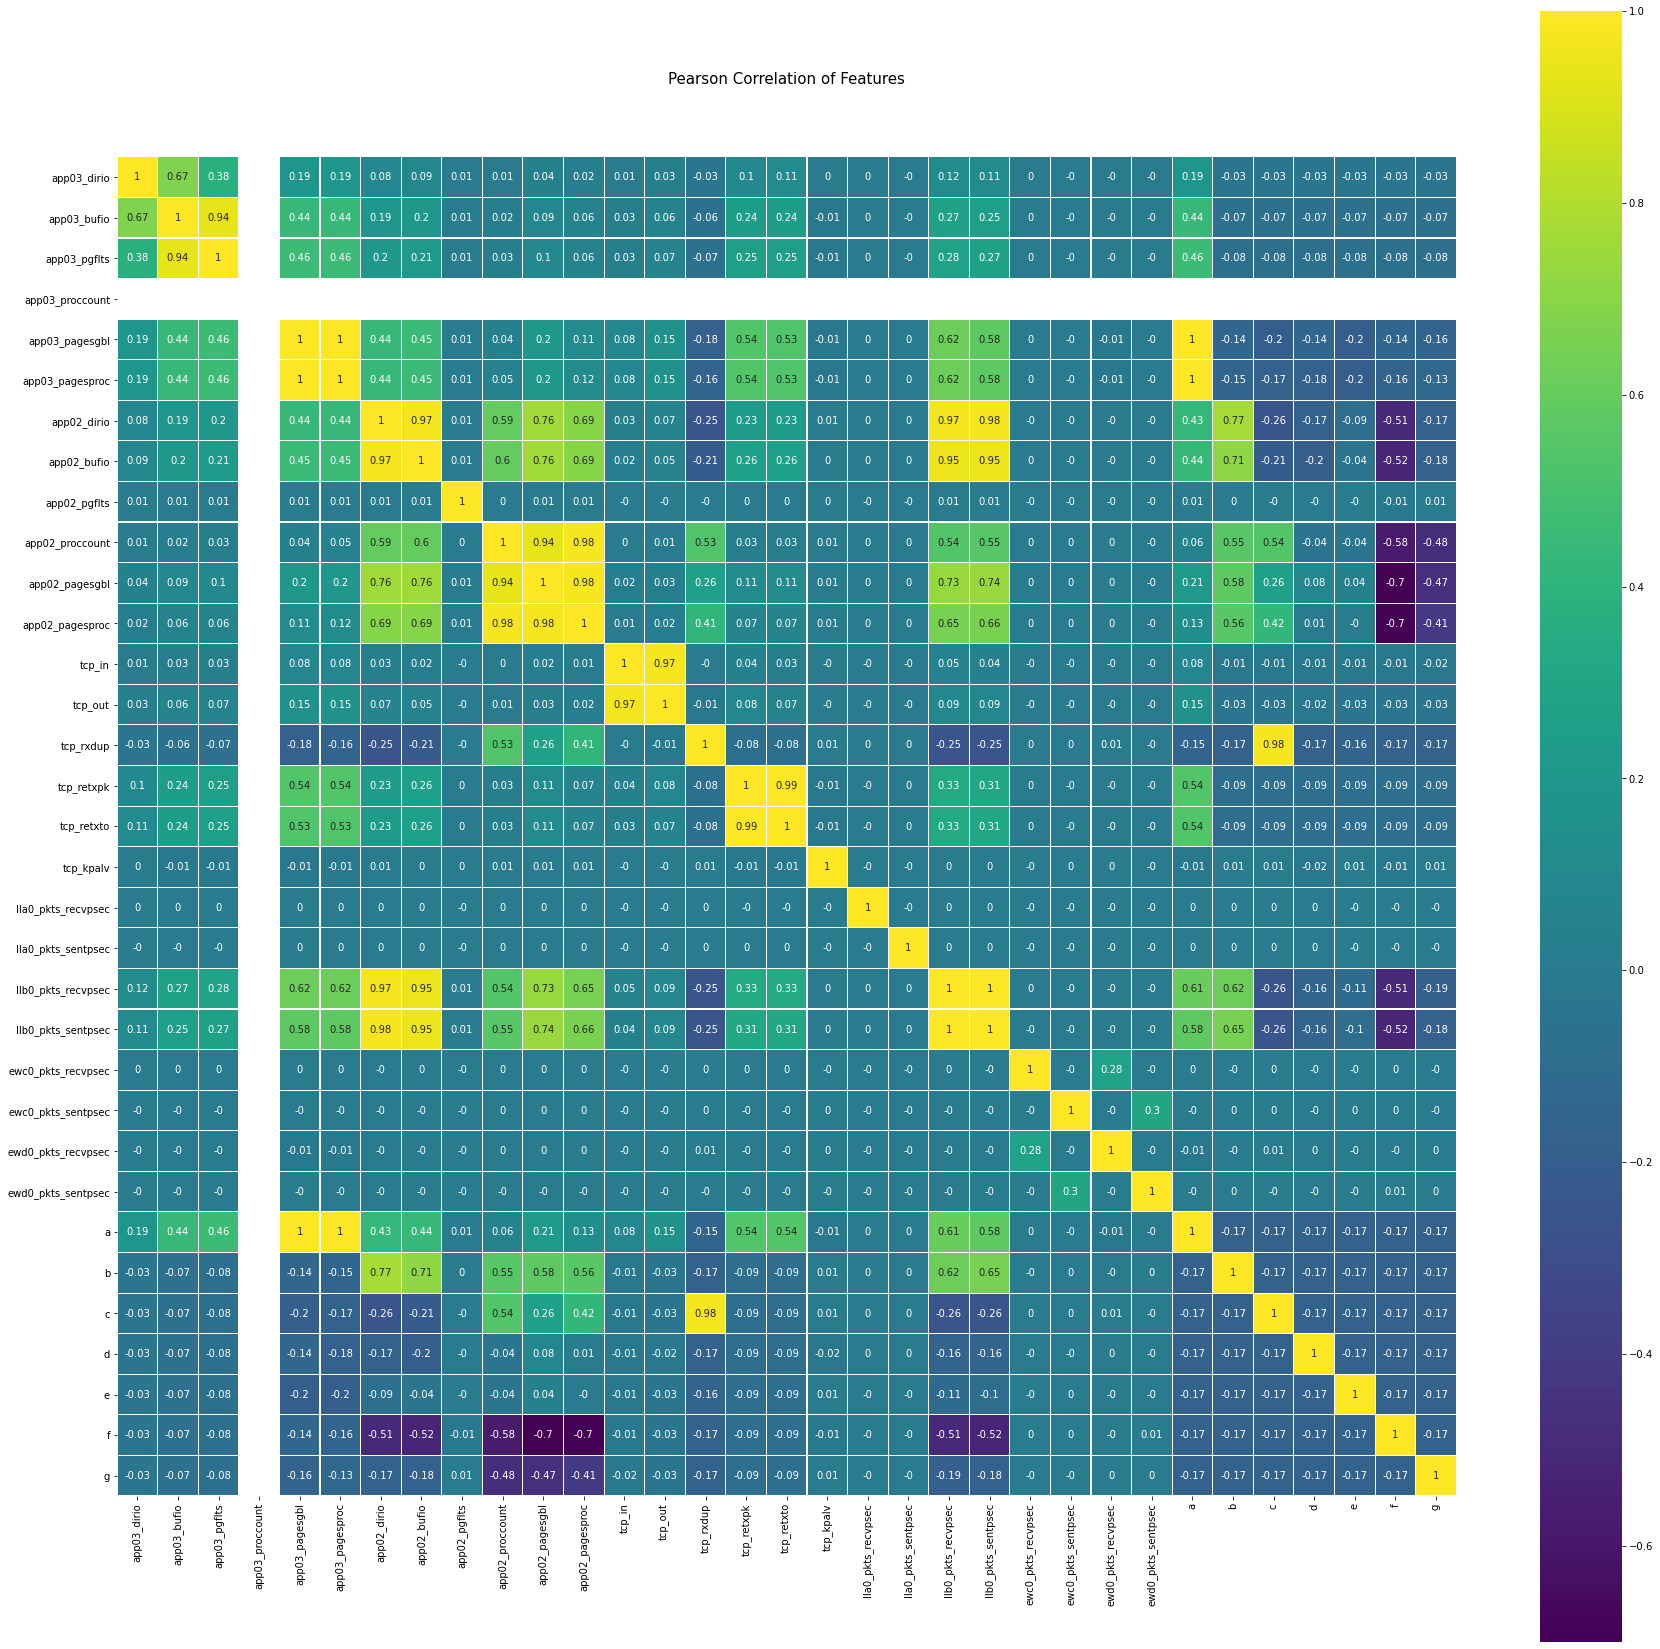

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(inp[inp.columns[60:]].corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

In [18]:
#Checking the training output dataset and its size
train_output

96701    medium
98027    medium
38328    medium
44124      high
35595    medium
          ...  
30209    medium
45948       low
8234     medium
17701    medium
5410        low
Name: cpu_load, Length: 107803, dtype: object

# Training on different models. Each Model show the best hyperparameter tuned.

# Deep Learning

In [19]:
#Label Encoding the output data for deep learning
gle = LabelEncoder()
train_output_1 = pd.DataFrame(gle.fit_transform(train_output))
test_output_1 = pd.DataFrame(gle.fit_transform(test_output))

In [20]:
#Standardizing the input data for deep learning
scaler = StandardScaler().fit(train_input)
train_input_mlp = scaler.transform(train_input)
scaler = StandardScaler().fit(test_input)
test_input_mlp = scaler.transform(test_input)

In [ ]:
#Training on a Deep Learning Model with optimized parameters
y_train_mlp = to_categorical(train_output_1)
y_test_mlp = to_categorical(test_output_1)
model = Sequential()
model.add(Dense(300, input_dim=93, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_input_mlp, y_train_mlp, epochs=150, batch_size=10, verbose=0, validation_split=0.2)

In [ ]:
model.evaluate(train_input_mlp, y_train_mlp)#Training Score

In [ ]:
model.evaluate(test_input_mlp, y_test_mlp)#Test Score

In [ ]:
confusion_matrix(y_true=test_output_1, y_pred=model.predict_classes(test_input))#Confusion Matrix

# Feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=300,max_depth=19,criterion='gini', random_state=42)
forest.fit(train_input, train_output)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(train_input.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
#picking the first 30 most important features
p = importances[indices][:30]
q=indices[:30]

In [ ]:
q

In [ ]:
#Selecting the corresponding columns and saving to a different Data Frame
train_input_trial = train_input[train_input.columns[q]]
test_input_trial = test_input[test_input.columns[q]]

# Random Forest modelling on complete Data Set: Kaggle Log Los-0.20672

In [ ]:
#traning
r_f=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 170,max_depth = 18,criterion='entropy',max_features=30)
r_f.fit(inp, out)

In [ ]:
r_f.score(train_input,train_output)#Training Score

In [ ]:
r_f.score(test_input,test_output)#Test Score

In [ ]:
confusion_matrix(test_output,r_f.predict(test_input))#Confusion Matrix

# Random Forest modelling on complete Data Set: Kaggle Log Los-0.20486

In [ ]:
#traning
r_f=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 250,max_depth = 16,criterion='entropy',max_features=32)
r_f.fit(inp, out)

In [ ]:
r_f.score(train_input,train_output) #Training Score

In [ ]:
r_f.score(test_input,test_output) #Test Score

In [ ]:
confusion_matrix(test_output,r_f.predict(test_input)) #Confuse Matrix

# Random Forest modelling on complete Data Set: Kaggle Log Los-0.20410


In [ ]:
#traning
r_f=RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators = 300,max_depth = 18,criterion='entropy',max_features=34)
# parameter = { 'n_estimators': [100,200, 500], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [1,2,3,4,5,6,7,8,9],'criterion' :['gini', 'entropy']}
#parameter = { 'n_estimators': [100],'criterion' :['gini','entropy'],'max_depth':[19,20]}
#r_f = GridSearchCV(estimator=r_f,param_grid=parameter, cv= 7,n_jobs=-1)
r_f.fit(inp, out)

In [ ]:
r_f.score(train_input,train_output)#Training Score

In [ ]:
r_f.score(test_input,test_output)#Test Score

In [ ]:
confusion_matrix(test_output,r_f.predict(test_input))#Confusion Matrix

# Histogram Gradient Boosting Classifier Using 30 most imp features

In [ ]:
#Training
hgb = HistGradientBoostingClassifier(learning_rate=0.1,
    max_iter=200,
    max_leaf_nodes=40,
    random_state=0,
    loss='categorical_crossentropy')
hgb.fit(train_input_trial, train_output)

In [ ]:
hgb.score(train_input_trial,train_output)#Training Score

In [ ]:
hgb.score(test_input_trial,test_output)#Test Score

In [ ]:
confusion_matrix(test_output,hgb.predict(test_input_trial))#Confusion Matrix

# Voting Classifiers

In [ ]:
#Using Random Forest and Histogram Gradient Boosting in Voting Classifier for a particualar set of tuned parameters
r_f=RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators = 600,max_depth = 32,criterion='entropy',max_features=34)
hgb = HistGradientBoostingClassifier(learning_rate=0.1,
    max_iter=1100,
    max_leaf_nodes=50,
    random_state=0,
    loss='categorical_crossentropy')
classifier = [('rf',r_f),('hgb',hgb)]
vc = VotingClassifier(estimators=classifier,voting='soft',n_jobs=-1)
vc.fit(inp,out)

In [ ]:
vc.score(train_input,train_output) #Training Score

In [ ]:
vc.score(test_input,test_output) #Test Score

In [ ]:
confusion_matrix(test_output,vc.predict(test_input)) #Confusion Matrix

# Voting Classifier

In [ ]:
r_f=RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators = 500,max_depth = 30,criterion='entropy',max_features=34)
gb = GradientBoostingClassifier(n_estimators=70,max_depth=6,learning_rate=0.145)
classifier = [('rf',r_f),('gb',gb)]
vc = VotingClassifier(estimators=classifier,voting='soft',n_jobs=-1)
vc.fit(inp,out)

In [ ]:
 vc.score(train_input,train_output) #Training Score

In [ ]:
vc.score(test_input,test_output) #Test Score

In [ ]:
confusion_matrix(test_output,vc.predict(test_input)) #Confusion Matrix

# Voting Classifier - Final Kaggle Submission-Kaggle Log Loss - 0.20042

In [ ]:
r_f=RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators = 500,max_depth = 18,criterion='entropy',max_features=34)
hgb = HistGradientBoostingClassifier(learning_rate=0.1,
    max_iter=1100,
    max_leaf_nodes=50,
    random_state=0,
    loss='categorical_crossentropy')
classifier = [('rf',r_f),('hgb',hgb)]
vc = VotingClassifier(estimators=classifier,voting='soft',n_jobs=-1)
vc.fit(inp,out)

In [ ]:
vc.score(train_input, train_output)

In [ ]:
vc.score(test_input,test_output)

In [ ]:
confusion_matrix(test_output,vc.predict(test_input))

# Gradient Boosting Trial 1

In [ ]:
g_b = GradientBoostingClassifier()
parameter = {'n_estimators': [70],'max_depth' : [6],'learning_rate' :[0.145]}
g_b = GridSearchCV(estimator=g_b,param_grid=parameter, cv= 7,n_jobs=-1)
g_b.fit(inp, out)
g_b.score(inp,out)#Training Score

In [ ]:
g_b.score(test_input,test_output)#Test Score

In [ ]:
confusion_matrix(test_output,g_b.predict(test_input))#Confusion Matrix

 # Gradient Boosting Trial 2

In [ ]:
#Training
g_b_1 = GradientBoostingClassifier(n_estimators=70,max_depth=6,learning_rate=0.145)
g_b_1.fit(train_input, train_output)
g_b_1.score(train_input,train_output)#Training Score

In [ ]:
g_b_1.score(test_input,test_output)#Test Score

In [ ]:
confusion_matrix(test_output,g_b_1.predict(test_input))#Confusion Matrix

# Gradient Boosting Trial 3

In [ ]:
g_b_1 = GradientBoostingClassifier(n_estimators=200,max_depth=6,learning_rate=0.015)
g_b_1.fit(train_input, train_output)
g_b_1.score(train_input,train_output)

In [ ]:
g_b_1.score(test_input,test_output)

In [ ]:
confusion_matrix(test_output,g_b_1.predict(test_input))

# Predicting the Classes on the Given Test Data

In [ ]:
#Loading Test Data
df_test = pd.DataFrame(pd.read_csv('/Users/utkarshmittal/Desktop/Education/Plaksha/Term 2/ML Lab1/ML Project/plaksha21-cm005-project/test.csv'))
#Checking for null values
df_test.isnull().values.any()
#Applying one hot encoding and concatinating similar to the Training Data Set
a = pd.get_dummies(df_test['m_id'])
df_test = pd.concat([df_test,a],axis=1)
#Dropping the m_id
df_test.drop('m_id',axis=1,inplace=True)

In [ ]:
#Fetching the IDs to another Data Frame
id = df_test['id']
#Droping the ID column
df_test.drop('id',axis=1,inplace=True)

In [ ]:
#Concatinating the model predicted probability and ID
result=pd.concat([id,pd.DataFrame(vc.predict_proba(df_test))],axis=1)

In [ ]:
#Renaming the Columns
result.rename(columns={0:'high',1:'low',2:'medium'},inplace=True)

In [ ]:
result

In [ ]:
#Rearranging the columns so that to adhere to submission requiremetns
result = result[['id','low','medium','high']]

In [ ]:
#Setting ID as the index of Data Frame
result = result.set_index('id')

In [ ]:
result

In [ ]:
#Writing to csv
result.to_csv('/Users/utkarshmittal/Desktop/Education/Plaksha/Term 2/ML Lab1/ML Project/plaksha21-cm005-project/result_vc_full.csv')